In [1]:
import atd2022

import torch
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sktime.performance_metrics.forecasting import (
    MeanAbsoluteScaledError,
    MeanSquaredError,
)
#import  as util
from atd_CoAtNet.atd_CoAtNet import ATD_CoAtNet
from utils.tools import dotdict
from CoAtNet_Forecaster_wrapper import CoAtNetForecaster

In [2]:
import torch
torch.cuda.is_available()

True

# Full Scale Test

In [3]:
torch.cuda.set_device(2) 

In [5]:
args = dotdict()

args.use_gpu=True
args.lr=0.0000001
args.batch_size=40
args.train_epochs=20

In [6]:
lispDL =  CoAtNetForecaster(args)

In [7]:
 # Load data
truth = atd2022.io.read_csv()

# Subset the data for the sake of making this fast.
# Remove if you want to run the example on the entire dataset.
truth = truth.head(108)

# Experiment Parameters
window = 100
num_predict = 4
gap = 0
slide = 1

# Create a dataset `Splitter` object for generating train/test splits
splitter = atd2022.backtest.Splitter(
    truth,
    window,
    num_predict,
    gap,
    slide,
    expanding=True,
) 

In [ ]:
 # Populate a list of models that support the `atd2022.forecasters.Forecaster` protocol
# with which will we generate historical forecasts
models = [
    lispDL,
    atd2022.forecasters.PredictMeanForecaster(),
    atd2022.forecasters.ExponentiallyWeightedMovingAverage(),
]

# Compute historical forecasts for all models
predictions = [
    atd2022.backtest.historical_forecast(model, splitter, verbose=True)
    for model in models
]

<CoAtNet_Forecaster_wrapper.CoAtNetForecaster object at 0x7f83dc09ffa0>:   0%|          | 0/5 [00:00<?, ?it/s]

Use GPU: cuda:None


/scratch/wzong/anaconda3/envs/atd2022/lib/python3.9/site-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([40, 1, 20])) that is different to the input size (torch.Size([40, 20])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


train_loss 22.97074317932129
train_loss 22.970727920532227
train_loss 22.970714569091797
train_loss 22.970701217651367
train_loss 22.970684051513672
train_loss 22.97066879272461
train_loss 22.97065544128418
train_loss 22.97064208984375
train_loss 22.970626831054688
train_loss 22.97060775756836
train_loss 22.970592498779297
train_loss 22.9705810546875
train_loss 22.97056770324707
train_loss 22.970552444458008
train_loss 22.970537185668945
train_loss 22.97052001953125
train_loss 22.97050666809082
train_loss 22.97049331665039
train_loss 22.970478057861328
train_loss 22.970462799072266
train_loss 12.000344276428223
train_loss 12.00033187866211
train_loss 12.00031852722168
train_loss 12.000307083129883
train_loss 12.000293731689453
train_loss 12.000280380249023
train_loss 12.000267028808594
train_loss 12.00025463104248
train_loss 12.000239372253418
train_loss 12.000226020812988
train_loss 12.000213623046875
train_loss 12.000199317932129
train_loss 12.000186920166016
train_loss 12.0001726150

train_loss 12.341971397399902
train_loss 12.341959953308105
train_loss 12.341949462890625
train_loss 12.341938018798828
train_loss 12.341928482055664
train_loss 12.341917037963867
train_loss 12.341906547546387
train_loss 12.34189510345459
train_loss 12.341883659362793
train_loss 12.34187126159668
train_loss 12.3418607711792
train_loss 12.341850280761719
train_loss 12.341838836669922
train_loss 12.341828346252441
train_loss 12.341816902160645
train_loss 12.341805458068848
train_loss 12.341794967651367
train_loss 12.34178352355957
train_loss 3.65434193611145
train_loss 3.6543307304382324
train_loss 3.6543185710906982
train_loss 3.6543071269989014
train_loss 3.6542952060699463
train_loss 3.6542835235595703
train_loss 3.6542720794677734
train_loss 3.6542599201202393
train_loss 3.654247760772705
train_loss 3.654236078262329
train_loss 3.6542232036590576
train_loss 3.65421199798584
train_loss 3.6541993618011475
train_loss 3.6541872024536133
train_loss 3.654174566268921
train_loss 3.654162645

train_loss 5.039765357971191
train_loss 5.039748191833496
train_loss 5.039734363555908
train_loss 5.039715766906738
train_loss 5.039698600769043
train_loss 5.039680004119873
train_loss 5.039661407470703
train_loss 5.03964376449585
train_loss 5.03962516784668
train_loss 5.03960657119751
train_loss 5.03958797454834
train_loss 5.03956937789917
train_loss 5.039549350738525
train_loss 5.039530277252197
train_loss 5.0395121574401855
train_loss 5.039492607116699
train_loss 5.039474964141846
train_loss 3.954052448272705
train_loss 3.9540393352508545
train_loss 3.954026222229004
train_loss 3.9540135860443115
train_loss 3.9540016651153564
train_loss 3.9539902210235596
train_loss 3.9539787769317627
train_loss 3.9539663791656494
train_loss 3.9539542198181152
train_loss 3.953941583633423
train_loss 3.9539313316345215
train_loss 3.9539196491241455
train_loss 3.9539077281951904
train_loss 3.95389723777771
train_loss 3.953886032104492
train_loss 3.953875780105591
train_loss 3.9538633823394775
train_lo

train_loss 2.1690635681152344
train_loss 2.4210684299468994
train_loss 2.421060085296631
train_loss 2.421050786972046
train_loss 2.42104172706604
train_loss 2.421032190322876
train_loss 2.421022891998291
train_loss 2.4210147857666016
train_loss 2.4210050106048584
train_loss 2.4209957122802734
train_loss 2.420984983444214
train_loss 2.420975685119629
train_loss 2.420966863632202
train_loss 2.4209578037261963
train_loss 2.4209511280059814
train_loss 2.4209389686584473
train_loss 2.420931339263916
train_loss 2.4209234714508057
train_loss 2.4209136962890625
train_loss 2.4209041595458984
train_loss 2.42089581489563
train_loss 2.2611212730407715
train_loss 2.2611119747161865
train_loss 2.261103630065918
train_loss 2.2610981464385986
train_loss 2.2610862255096436
train_loss 2.261075735092163
train_loss 2.26106858253479
train_loss 2.2610576152801514
train_loss 2.2610487937927246
train_loss 2.2610394954681396
train_loss 2.261030435562134
train_loss 2.261021137237549
train_loss 2.261012077331543

train_loss 5.735598087310791
train_loss 8.185009956359863
train_loss 8.184998512268066
train_loss 8.18498420715332
train_loss 8.18497371673584
train_loss 8.18496036529541
train_loss 8.18494701385498
train_loss 8.18493938446045
train_loss 8.184921264648438
train_loss 8.184913635253906
train_loss 8.184903144836426
train_loss 8.18488883972168
train_loss 8.1848783493042
train_loss 8.184863090515137
train_loss 8.184852600097656
train_loss 8.184837341308594
train_loss 8.18482494354248
train_loss 8.184813499450684
train_loss 8.184800148010254
train_loss 8.184792518615723
train_loss 8.184776306152344
train_loss 4.616451263427734
train_loss 4.616437911987305
train_loss 4.616429328918457
train_loss 4.616411209106445
train_loss 4.616402626037598
train_loss 4.616384983062744
train_loss 4.616368770599365
train_loss 4.616355895996094
train_loss 4.61633825302124
train_loss 4.616325855255127
train_loss 4.6163129806518555
train_loss 4.616298675537109
train_loss 4.616283416748047
train_loss 4.6162738800

train_loss 0.000870389980264008
train_loss 0.000870362448040396
train_loss 0.0008704827050678432
train_loss 0.0008705663494765759
train_loss 0.0008705915533937514
train_loss 0.0008706484222784638
train_loss 0.0008706541266292334
train_loss 0.0008706349763087928
train_loss 0.0008707117522135377
train_loss 0.0008706963271833956
train_loss 0.0008707339293323457
train_loss 0.0008707327651791275
train_loss 0.0008707590750418603
train_loss 0.0008707495289854705
train_loss 0.0008707004017196596
train_loss 0.000870712217874825
train_loss 1.8548569679260254
train_loss 1.8548563718795776
train_loss 1.854852557182312
train_loss 1.854844570159912
train_loss 1.8548468351364136
train_loss 1.8548411130905151
train_loss 1.8548320531845093
train_loss 1.8548359870910645
train_loss 1.854823112487793
train_loss 1.8548177480697632
train_loss 1.8548082113265991
train_loss 1.8548065423965454
train_loss 1.854800820350647
train_loss 1.8547922372817993
train_loss 1.8547847270965576
train_loss 1.8547816276550293

train_loss 2.7972519397735596
train_loss 2.7972490787506104
train_loss 2.7972238063812256
train_loss 2.797212600708008
train_loss 2.7972121238708496
train_loss 2.7971980571746826
train_loss 2.7971856594085693
train_loss 2.7971689701080322
train_loss 2.7971534729003906
train_loss 2.797154426574707
train_loss 2.7971301078796387
train_loss 2.7971246242523193
train_loss 2.7971060276031494
train_loss 2.7970991134643555
train_loss 2.797078847885132
train_loss 2.797071695327759
train_loss 3.3415610790252686
train_loss 3.3415427207946777
train_loss 3.341538667678833
train_loss 3.34153151512146
train_loss 3.3415138721466064
train_loss 3.3415019512176514
train_loss 3.341493844985962
train_loss 3.3414857387542725
train_loss 3.341478109359741
train_loss 3.3414692878723145
train_loss 3.3414509296417236
train_loss 3.341437816619873
train_loss 3.341427803039551
train_loss 3.3414132595062256
train_loss 3.3414011001586914
train_loss 3.341392755508423
train_loss 3.341386079788208
train_loss 3.3413786888

train_loss 1.9127790927886963
train_loss 1.912766695022583
train_loss 1.9127612113952637
train_loss 1.9127455949783325
train_loss 1.9127424955368042
train_loss 1.9127179384231567
train_loss 1.9127047061920166
train_loss 1.9126912355422974
train_loss 1.9126899242401123
train_loss 1.9126849174499512
train_loss 1.912665605545044
train_loss 1.9126485586166382
train_loss 1.9126540422439575
train_loss 1.9126412868499756
train_loss 1.9126282930374146
train_loss 1.9126274585723877
train_loss 8.865955352783203
train_loss 8.86593246459961
train_loss 8.865920066833496
train_loss 8.8659029006958
train_loss 8.865899085998535
train_loss 8.86585807800293
train_loss 8.865860939025879
train_loss 8.86584186553955
train_loss 8.865824699401855
train_loss 8.865795135498047
train_loss 8.865764617919922
train_loss 8.865742683410645
train_loss 8.865731239318848
train_loss 8.86572265625
train_loss 8.865687370300293
train_loss 8.865669250488281
train_loss 8.865653038024902
train_loss 8.865633010864258
train_los

train_loss 3.2585275173187256
train_loss 3.2585179805755615
train_loss 3.258518934249878
train_loss 3.2584948539733887
train_loss 3.2584869861602783
train_loss 3.258488416671753
train_loss 3.2584609985351562
train_loss 3.2584595680236816
train_loss 3.258450508117676
train_loss 3.2584195137023926
train_loss 3.258413076400757
train_loss 3.258413791656494
train_loss 3.258404493331909
train_loss 3.258366823196411
train_loss 3.2583653926849365
train_loss 3.258352279663086
train_loss 3.258326292037964
train_loss 1.5705784559249878
train_loss 1.5705845355987549
train_loss 1.5705565214157104
train_loss 1.5705546140670776
train_loss 1.5705523490905762
train_loss 1.5705265998840332
train_loss 1.5705267190933228
train_loss 1.5705113410949707
train_loss 1.5705127716064453
train_loss 1.5704931020736694
train_loss 1.5704909563064575
train_loss 1.5704830884933472
train_loss 1.5704731941223145
train_loss 1.570454478263855
train_loss 1.5704514980316162
train_loss 1.570433259010315
train_loss 1.57044339

train_loss 0.0035387063398957253
train_loss 0.003538804594427347
train_loss 0.003538726596161723
train_loss 6.52845573425293
train_loss 6.528463840484619
train_loss 6.528432846069336
train_loss 6.52844762802124
train_loss 6.528430938720703
train_loss 6.528424263000488
train_loss 6.528440475463867
train_loss 6.52842903137207
train_loss 6.528411388397217
train_loss 6.528386116027832
train_loss 6.528400897979736
train_loss 6.528381824493408
train_loss 6.528364181518555
train_loss 6.528355598449707
train_loss 6.5283355712890625
train_loss 6.528337478637695
train_loss 6.528326511383057
train_loss 6.528324604034424
train_loss 6.528306484222412
train_loss 6.528285503387451
train_loss 1.3981648683547974
train_loss 1.3981482982635498
train_loss 1.3981592655181885
train_loss 1.3981375694274902
train_loss 1.3981224298477173
train_loss 1.3981267213821411
train_loss 1.398099660873413
train_loss 1.3980976343154907
train_loss 1.398094654083252
train_loss 1.3980787992477417
train_loss 1.39808130264282

train_loss 5.656215190887451
train_loss 62.96927261352539
train_loss 62.96924591064453
train_loss 62.96916198730469
train_loss 62.9691047668457
train_loss 62.969024658203125
train_loss 62.96897888183594
train_loss 62.968894958496094
train_loss 62.96885299682617
train_loss 62.9687385559082
train_loss 62.96867370605469
train_loss 62.96854019165039
train_loss 62.96855163574219
train_loss 62.96846389770508
train_loss 62.96830749511719
train_loss 62.9682731628418
train_loss 62.96818923950195
train_loss 62.968135833740234
train_loss 62.96797180175781
train_loss 62.96788024902344
train_loss 62.9677848815918
train_loss 8.252653121948242
train_loss 8.252599716186523
train_loss 8.252598762512207
train_loss 8.252549171447754
train_loss 8.252549171447754
train_loss 8.25249195098877
train_loss 8.25245189666748
train_loss 8.252443313598633
train_loss 8.25236988067627
train_loss 8.252400398254395
train_loss 8.252338409423828
train_loss 8.252326965332031
train_loss 8.252296447753906
train_loss 8.25228

train_loss 7.035545349121094
train_loss 7.0355706214904785
train_loss 7.035556316375732
train_loss 7.035520076751709
train_loss 7.035472869873047
train_loss 7.035496234893799
train_loss 7.035446643829346
train_loss 7.035467147827148
train_loss 7.035435676574707
train_loss 7.035458087921143
train_loss 7.035394668579102
train_loss 7.035383224487305
train_loss 7.0353684425354
train_loss 7.035370349884033
train_loss 7.035344123840332
train_loss 7.035327434539795
train_loss 7.0353546142578125
train_loss 7.035302639007568
train_loss 7.035281181335449
train_loss 1.7671233415603638
train_loss 1.7671085596084595
train_loss 1.7670916318893433
train_loss 1.7670865058898926
train_loss 1.7670938968658447
train_loss 1.767051339149475
train_loss 1.7670689821243286
train_loss 1.7670625448226929
train_loss 1.7670392990112305
train_loss 1.7670334577560425
train_loss 1.7670224905014038
train_loss 1.7670096158981323
train_loss 1.766984462738037
train_loss 1.7670061588287354
train_loss 1.7669830322265625
t

train_loss 7.404476165771484
train_loss 7.4044718742370605
train_loss 7.404472351074219
train_loss 7.404454231262207
train_loss 7.404423236846924
train_loss 7.404438495635986
train_loss 7.404411315917969
train_loss 7.4043965339660645
train_loss 7.404329299926758
train_loss 7.404330253601074
train_loss 7.4043354988098145
train_loss 7.404338359832764
train_loss 7.404338359832764
train_loss 7.404297828674316
train_loss 7.404216289520264
train_loss 7.404191970825195
train_loss 10.156636238098145
train_loss 10.156580924987793
train_loss 10.156601905822754
train_loss 10.15655517578125
train_loss 10.156564712524414
train_loss 10.156549453735352
train_loss 10.156538963317871
train_loss 10.156461715698242
train_loss 10.156512260437012
train_loss 10.156510353088379
train_loss 10.156462669372559
train_loss 10.156472206115723
train_loss 10.156447410583496
train_loss 10.156424522399902
train_loss 10.156410217285156
train_loss 10.156347274780273
train_loss 10.156391143798828
train_loss 10.1563758850

train_loss 3.1764137744903564
train_loss 3.1764469146728516
train_loss 3.176419973373413
train_loss 3.1763906478881836
train_loss 3.1763947010040283
train_loss 3.1763646602630615
train_loss 3.1763718128204346
train_loss 3.1763737201690674
train_loss 3.1763179302215576
train_loss 3.176340103149414
train_loss 3.176337957382202
train_loss 3.1763317584991455
train_loss 3.176276445388794
train_loss 3.1762750148773193
train_loss 3.176295042037964
train_loss 3.1762917041778564
train_loss 8.614676475524902
train_loss 8.614673614501953
train_loss 8.614673614501953
train_loss 8.614660263061523
train_loss 8.614654541015625
train_loss 8.614652633666992
train_loss 8.614641189575195
train_loss 8.6146240234375
train_loss 8.614624977111816
train_loss 8.614630699157715
train_loss 8.614598274230957
train_loss 8.614603996276855
train_loss 8.614574432373047
train_loss 8.614587783813477
train_loss 8.614561080932617
train_loss 8.614559173583984
train_loss 8.614564895629883
train_loss 8.61456298828125
train_

train_loss 3.884840965270996
train_loss 3.8848495483398438
train_loss 3.8848206996917725
train_loss 3.8848347663879395
train_loss 3.8848390579223633
train_loss 3.8848283290863037
train_loss 3.8848114013671875
train_loss 3.884819269180298
train_loss 3.884772777557373
train_loss 3.884845733642578
train_loss 3.8848025798797607
train_loss 3.8848166465759277
train_loss 3.884821891784668
train_loss 3.884781837463379
train_loss 3.8847694396972656
train_loss 3.8847882747650146
train_loss 3.8847708702087402
train_loss 3.884777545928955
train_loss 5.658263683319092
train_loss 5.658304214477539
train_loss 5.658288478851318
train_loss 5.658282279968262
train_loss 5.658265113830566
train_loss 5.658235549926758
train_loss 5.658253192901611
train_loss 5.658228397369385
train_loss 5.6582560539245605
train_loss 5.6581878662109375
train_loss 5.658184051513672
train_loss 5.65816593170166
train_loss 5.658237457275391
train_loss 5.658142566680908
train_loss 5.65816593170166
train_loss 5.658113956451416
tra

train_loss 12.635152816772461
train_loss 12.635132789611816
train_loss 12.635088920593262
train_loss 12.63501262664795
train_loss 12.634942054748535
train_loss 12.634998321533203
train_loss 12.63499641418457
train_loss 12.634984970092773
train_loss 12.63483715057373
train_loss 12.634830474853516
train_loss 12.634786605834961
train_loss 12.634718894958496
train_loss 12.63472843170166
train_loss 12.634590148925781
train_loss 11.848896026611328
train_loss 11.848857879638672
train_loss 11.848859786987305
train_loss 11.848871231079102
train_loss 11.848859786987305
train_loss 11.848824501037598
train_loss 11.848838806152344
train_loss 11.8488187789917
train_loss 11.848816871643066
train_loss 11.848740577697754
train_loss 11.848770141601562
train_loss 11.848731994628906
train_loss 11.84874153137207
train_loss 11.848721504211426
train_loss 11.848743438720703
train_loss 11.84869384765625
train_loss 11.84865665435791
train_loss 11.848682403564453
train_loss 11.848719596862793
train_loss 11.84865

train_loss 2.4768781661987305
train_loss 2.476977586746216
train_loss 2.476893186569214
train_loss 2.4768624305725098
train_loss 2.476875066757202
train_loss 2.4768664836883545
train_loss 2.476855993270874
train_loss 2.4767730236053467
train_loss 2.4768388271331787
train_loss 2.476844310760498
train_loss 2.476816415786743
train_loss 2.4768178462982178
train_loss 2.4767415523529053
train_loss 1.956560492515564
train_loss 1.9565677642822266
train_loss 1.9565691947937012
train_loss 1.9565675258636475
train_loss 1.956559658050537
train_loss 1.9565609693527222
train_loss 1.9565545320510864
train_loss 1.9565452337265015
train_loss 1.9565454721450806
train_loss 1.956549882888794
train_loss 1.9565526247024536
train_loss 1.956540584564209
train_loss 1.9565430879592896
train_loss 1.956538200378418
train_loss 1.9565359354019165
train_loss 1.9565411806106567
train_loss 1.9565391540527344
train_loss 1.9565341472625732
train_loss 1.9565482139587402
train_loss 1.9565513134002686
train_loss 9.71052169

train_loss 1.7380183935165405
train_loss 1.738011360168457
train_loss 1.7379597425460815
train_loss 1.7379577159881592
train_loss 1.7379658222198486
train_loss 1.7380181550979614
train_loss 1.7379904985427856
train_loss 1.7379391193389893
train_loss 1.7379165887832642
train_loss 1.7378685474395752
train_loss 1.73784601688385
train_loss 1.7379207611083984
train_loss 6.546118259429932
train_loss 6.5461506843566895
train_loss 6.546098709106445
train_loss 6.546111106872559
train_loss 6.54604434967041
train_loss 6.546035289764404
train_loss 6.54602575302124
train_loss 6.545999526977539
train_loss 6.546008586883545
train_loss 6.546065807342529
train_loss 6.545956134796143
train_loss 6.546020030975342
train_loss 6.545989990234375
train_loss 6.545971393585205
train_loss 6.5459465980529785
train_loss 6.545908451080322
train_loss 6.54590368270874
train_loss 6.545854091644287
train_loss 6.5458879470825195
train_loss 6.545927047729492
train_loss 1.9833722114562988
train_loss 1.9832795858383179
tra

train_loss 0.004107171203941107
train_loss 0.0041042049415409565
train_loss 0.0041058300994336605
train_loss 0.004107118584215641
train_loss 0.004105102736502886
train_loss 0.00410578865557909
train_loss 0.00410572811961174
train_loss 0.004103383980691433
train_loss 0.004104842431843281
train_loss 0.0041045076213777065
train_loss 0.004106929991394281
train_loss 2.183645725250244
train_loss 2.1836721897125244
train_loss 2.183601140975952
train_loss 2.183671712875366
train_loss 2.183650493621826
train_loss 2.1836509704589844
train_loss 2.183682918548584
train_loss 2.1836421489715576
train_loss 2.1836743354797363
train_loss 2.1836819648742676
train_loss 2.1836156845092773
train_loss 2.1835694313049316
train_loss 2.1835901737213135
train_loss 2.183589220046997
train_loss 2.1835641860961914
train_loss 2.183635711669922
train_loss 2.183610200881958
train_loss 2.183528423309326
train_loss 2.183547019958496
train_loss 2.183588981628418
train_loss 3.314058780670166
train_loss 3.3140006065368652

/scratch/wzong/LISP-ATD-2022/CoAtNet/atd_CoAtNet/atd_CoAtNet.py:154: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = model(torch.tensor(inputs).to(device).float()).cpu().detach().numpy()


Use GPU: cuda:None
train_loss 22.97140121459961
train_loss 22.971389770507812
train_loss 22.97137451171875
train_loss 22.97136116027832
train_loss 22.971342086791992
train_loss 22.971328735351562
train_loss 22.971315383911133
train_loss 22.97130012512207
train_loss 22.971284866333008
train_loss 22.971271514892578
train_loss 22.971256256103516
train_loss 22.971242904663086
train_loss 22.97122573852539
train_loss 22.97121238708496
train_loss 22.9711971282959
train_loss 22.971181869506836
train_loss 22.971168518066406
train_loss 22.971153259277344
train_loss 22.97113800048828
train_loss 22.97112274169922
train_loss 12.014625549316406
train_loss 12.01461410522461
train_loss 12.014599800109863
train_loss 12.01458740234375
train_loss 12.014575004577637
train_loss 12.01456069946289
train_loss 12.014548301696777
train_loss 12.014533996582031
train_loss 12.014521598815918
train_loss 12.014509201049805
train_loss 12.014496803283691
train_loss 12.014484405517578
train_loss 12.014470100402832
trai

train_loss 12.351268768310547
train_loss 12.351259231567383
train_loss 12.351248741149902
train_loss 12.351239204406738
train_loss 12.351226806640625
train_loss 12.351215362548828
train_loss 12.351204872131348
train_loss 12.351194381713867
train_loss 12.351181983947754
train_loss 12.35117244720459
train_loss 12.35116195678711
train_loss 12.351150512695312
train_loss 12.351139068603516
train_loss 12.351127624511719
train_loss 12.351117134094238
train_loss 12.351103782653809
train_loss 12.351094245910645
train_loss 12.351082801818848
train_loss 12.35107135772705
train_loss 3.673825263977051
train_loss 3.673814058303833
train_loss 3.673802375793457
train_loss 3.6737916469573975
train_loss 3.6737797260284424
train_loss 3.6737682819366455
train_loss 3.6737563610076904
train_loss 3.6737444400787354
train_loss 3.6737329959869385
train_loss 3.6737210750579834
train_loss 3.6737091541290283
train_loss 3.673696994781494
train_loss 3.673685312271118
train_loss 3.6736724376678467
train_loss 3.67366

train_loss 5.065864562988281
train_loss 5.065849781036377
train_loss 5.06583309173584
train_loss 5.065816879272461
train_loss 5.065799236297607
train_loss 5.065783500671387
train_loss 5.0657639503479
train_loss 5.065746307373047
train_loss 5.065728664398193
train_loss 5.065710544586182
train_loss 5.065690040588379
train_loss 5.065671443939209
train_loss 5.065654754638672
train_loss 5.06563663482666
train_loss 5.065616607666016
train_loss 5.065598011016846
train_loss 5.065578460693359
train_loss 5.065561294555664
train_loss 3.9725940227508545
train_loss 3.9725797176361084
train_loss 3.972567081451416
train_loss 3.9725565910339355
train_loss 3.9725422859191895
train_loss 3.9725303649902344
train_loss 3.972517967224121
train_loss 3.972506046295166
train_loss 3.9724960327148438
train_loss 3.9724831581115723
train_loss 3.9724721908569336
train_loss 3.9724600315093994
train_loss 3.97244930267334
train_loss 3.972438097000122
train_loss 3.972426652908325
train_loss 3.97241473197937
train_loss 

train_loss 2.419116258621216
train_loss 2.4191064834594727
train_loss 2.419097900390625
train_loss 2.419090509414673
train_loss 2.419081211090088
train_loss 2.4190728664398193
train_loss 2.4190635681152344
train_loss 2.419053792953491
train_loss 2.419043779373169
train_loss 2.4190359115600586
train_loss 2.419025421142578
train_loss 2.4190163612365723
train_loss 2.41900897026062
train_loss 2.4190001487731934
train_loss 2.418994188308716
train_loss 2.4189820289611816
train_loss 2.418973207473755
train_loss 2.280026912689209
train_loss 2.2800188064575195
train_loss 2.280010938644409
train_loss 2.2799999713897705
train_loss 2.2799909114837646
train_loss 2.2799835205078125
train_loss 2.279973268508911
train_loss 2.279966354370117
train_loss 2.2799553871154785
train_loss 2.279946804046631
train_loss 2.279937505722046
train_loss 2.279928684234619
train_loss 2.2799201011657715
train_loss 2.279909372329712
train_loss 2.2798986434936523
train_loss 2.2798922061920166
train_loss 2.279879570007324


train_loss 5.7613959312438965
train_loss 8.211804389953613
train_loss 8.211791038513184
train_loss 8.21178150177002
train_loss 8.211772918701172
train_loss 8.211759567260742
train_loss 8.211751937866211
train_loss 8.211732864379883
train_loss 8.211726188659668
train_loss 8.211712837219238
train_loss 8.211702346801758
train_loss 8.211686134338379
train_loss 8.211675643920898
train_loss 8.211661338806152
train_loss 8.211652755737305
train_loss 8.211636543273926
train_loss 8.211624145507812
train_loss 8.211614608764648
train_loss 8.211599349975586
train_loss 8.21158504486084
train_loss 8.211572647094727
train_loss 4.629063606262207
train_loss 4.629052639007568
train_loss 4.629036903381348
train_loss 4.629027366638184
train_loss 4.629011154174805
train_loss 4.628991603851318
train_loss 4.628983497619629
train_loss 4.628970146179199
train_loss 4.628955364227295
train_loss 4.628934860229492
train_loss 4.628922462463379
train_loss 4.628903388977051
train_loss 4.628893852233887
train_loss 4.62

train_loss 0.0010697406250983477
train_loss 0.0010697825346142054
train_loss 0.001069753896445036
train_loss 0.0010697158286347985
train_loss 0.0010696916142478585
train_loss 0.0010697458637878299
train_loss 0.0010697583202272654
train_loss 0.0010697109391912818
train_loss 0.0010697434190660715
train_loss 0.001069725607521832
train_loss 0.0010697500547394156
train_loss 0.0010696965036913753
train_loss 0.0010697549441829324
train_loss 0.0010697179241105914
train_loss 0.0010696847457438707
train_loss 0.001069669029675424
train_loss 0.0010695881210267544
train_loss 0.0010696797398850322
train_loss 0.0010696712415665388
train_loss 1.8745232820510864
train_loss 1.8745191097259521
train_loss 1.8745293617248535
train_loss 1.8745228052139282
train_loss 1.8745102882385254
train_loss 1.874507188796997
train_loss 1.874502420425415
train_loss 1.8744993209838867
train_loss 1.874497890472412
train_loss 1.874485969543457
train_loss 1.8744863271713257
train_loss 1.8744828701019287
train_loss 1.8744666

train_loss 2.8122458457946777
train_loss 2.812230110168457
train_loss 2.8122267723083496
train_loss 2.8122246265411377
train_loss 2.812208414077759
train_loss 2.812187433242798
train_loss 2.8121871948242188
train_loss 2.8121743202209473
train_loss 2.812168598175049
train_loss 2.812145233154297
train_loss 2.812147855758667
train_loss 2.8121297359466553
train_loss 2.8121159076690674
train_loss 2.8120999336242676
train_loss 2.8120949268341064
train_loss 2.812077283859253
train_loss 2.8120577335357666
train_loss 2.8120534420013428
train_loss 2.81203293800354
train_loss 2.8120334148406982
train_loss 3.3616373538970947
train_loss 3.361635208129883
train_loss 3.3616256713867188
train_loss 3.3616087436676025
train_loss 3.3615992069244385
train_loss 3.3615782260894775
train_loss 3.3615801334381104
train_loss 3.3615636825561523
train_loss 3.3615450859069824
train_loss 3.3615429401397705
train_loss 3.361523151397705
train_loss 3.3615121841430664
train_loss 3.361504554748535
train_loss 3.361487865

train_loss 42.10000991821289
train_loss 42.0999870300293
train_loss 1.9322474002838135
train_loss 1.9322336912155151
train_loss 1.9322210550308228
train_loss 1.9322047233581543
train_loss 1.932180643081665
train_loss 1.9321773052215576
train_loss 1.9321651458740234
train_loss 1.9321502447128296
train_loss 1.9321385622024536
train_loss 1.9321198463439941
train_loss 1.932118535041809
train_loss 1.932102084159851
train_loss 1.932104229927063
train_loss 1.9320859909057617
train_loss 1.9320873022079468
train_loss 1.9320664405822754
train_loss 1.9320484399795532
train_loss 1.9320460557937622
train_loss 1.9320476055145264
train_loss 1.9320088624954224
train_loss 8.876204490661621
train_loss 8.876180648803711
train_loss 8.876173973083496
train_loss 8.876147270202637
train_loss 8.876138687133789
train_loss 8.876129150390625
train_loss 8.876096725463867
train_loss 8.876082420349121
train_loss 8.876070976257324
train_loss 8.876054763793945
train_loss 8.876015663146973
train_loss 8.876008033752441

train_loss 1.3313223123550415
train_loss 3.2561042308807373
train_loss 3.256115674972534
train_loss 3.2561047077178955
train_loss 3.256075859069824
train_loss 3.2560489177703857
train_loss 3.256058692932129
train_loss 3.2560527324676514
train_loss 3.2560360431671143
train_loss 3.2560198307037354
train_loss 3.2560088634490967
train_loss 3.2560017108917236
train_loss 3.2559731006622314
train_loss 3.2559778690338135
train_loss 3.2559518814086914
train_loss 3.255946397781372
train_loss 3.2559361457824707
train_loss 3.255922555923462
train_loss 3.2559165954589844
train_loss 3.2558741569519043
train_loss 3.255866765975952
train_loss 1.588883876800537
train_loss 1.588855266571045
train_loss 1.5888667106628418
train_loss 1.588844895362854
train_loss 1.588833212852478
train_loss 1.5888352394104004
train_loss 1.5888277292251587
train_loss 1.5888170003890991
train_loss 1.5887948274612427
train_loss 1.588784098625183
train_loss 1.5887893438339233
train_loss 1.5887757539749146
train_loss 1.58874547

train_loss 0.0037328226026147604
train_loss 0.0037325681187212467
train_loss 0.0037327283062040806
train_loss 0.00373291689902544
train_loss 0.0037328365724533796
train_loss 0.0037325420416891575
train_loss 6.540609836578369
train_loss 6.540630340576172
train_loss 6.54058837890625
train_loss 6.54063081741333
train_loss 6.5406107902526855
train_loss 6.540602684020996
train_loss 6.540604591369629
train_loss 6.540563583374023
train_loss 6.540604591369629
train_loss 6.540581703186035
train_loss 6.540555477142334
train_loss 6.540534973144531
train_loss 6.540500640869141
train_loss 6.54052734375
train_loss 6.540528297424316
train_loss 6.540489673614502
train_loss 6.540503025054932
train_loss 6.540462017059326
train_loss 6.540470123291016
train_loss 6.540440559387207
train_loss 1.416006088256836
train_loss 1.4160069227218628
train_loss 1.4159995317459106
train_loss 1.4159749746322632
train_loss 1.4159636497497559
train_loss 1.415967583656311
train_loss 1.4159705638885498
train_loss 1.41593611

train_loss 5.6652116775512695
train_loss 5.665217876434326
train_loss 5.665217876434326
train_loss 5.665225982666016
train_loss 5.665208339691162
train_loss 5.665205955505371
train_loss 5.665219783782959
train_loss 5.665175437927246
train_loss 62.970394134521484
train_loss 62.970375061035156
train_loss 62.97031021118164
train_loss 62.97030258178711
train_loss 62.97026062011719
train_loss 62.97012710571289
train_loss 62.97011184692383
train_loss 62.969940185546875
train_loss 62.969932556152344
train_loss 62.96992492675781
train_loss 62.9698600769043
train_loss 62.96973419189453
train_loss 62.969608306884766
train_loss 62.96953582763672
train_loss 62.9693717956543
train_loss 62.96942901611328
train_loss 62.96920394897461
train_loss 62.96909713745117
train_loss 62.96904754638672
train_loss 62.968994140625
train_loss 8.268889427185059
train_loss 8.268850326538086
train_loss 8.268811225891113
train_loss 8.268818855285645
train_loss 8.268754005432129
train_loss 8.268701553344727
train_loss 8

train_loss 8.602789878845215
train_loss 8.60283088684082
train_loss 8.602740287780762
train_loss 8.602736473083496
train_loss 8.602734565734863
train_loss 8.602734565734863
train_loss 7.047539234161377
train_loss 7.047496795654297
train_loss 7.0475239753723145
train_loss 7.04746150970459
train_loss 7.0474653244018555
train_loss 7.04745626449585
train_loss 7.047427654266357
train_loss 7.047468185424805
train_loss 7.047388076782227
train_loss 7.047391891479492
train_loss 7.047389030456543
train_loss 7.047335147857666
train_loss 7.047329902648926
train_loss 7.047309398651123
train_loss 7.047299385070801
train_loss 7.047290325164795
train_loss 7.04725980758667
train_loss 7.047229290008545
train_loss 7.047211170196533
train_loss 7.047248363494873
train_loss 1.7810755968093872
train_loss 1.78108549118042
train_loss 1.7810577154159546
train_loss 1.7810304164886475
train_loss 1.7810540199279785
train_loss 1.7810086011886597
train_loss 1.7810144424438477
train_loss 1.7810102701187134
train_loss

train_loss 5.7844319343566895
train_loss 5.784458160400391
train_loss 5.784450531005859
train_loss 5.784420490264893
train_loss 5.784415245056152
train_loss 7.416182518005371
train_loss 7.416187286376953
train_loss 7.416142463684082
train_loss 7.41609525680542
train_loss 7.416109561920166
train_loss 7.4160685539245605
train_loss 7.416046142578125
train_loss 7.41605806350708
train_loss 7.41607141494751
train_loss 7.416049480438232
train_loss 7.416036128997803
train_loss 7.415955543518066
train_loss 7.416001319885254
train_loss 7.415994167327881
train_loss 7.415962219238281
train_loss 7.41588020324707
train_loss 7.415894031524658
train_loss 7.415908336639404
train_loss 7.415879249572754
train_loss 7.415898323059082
train_loss 10.168940544128418
train_loss 10.168924331665039
train_loss 10.168951988220215
train_loss 10.168915748596191
train_loss 10.168882369995117
train_loss 10.168819427490234
train_loss 10.168830871582031
train_loss 10.16883373260498
train_loss 10.16885757446289
train_los

train_loss 4.458235740661621
train_loss 4.458245754241943
train_loss 3.1959269046783447
train_loss 3.1959497928619385
train_loss 3.195952892303467
train_loss 3.1959056854248047
train_loss 3.195869207382202
train_loss 3.19589900970459
train_loss 3.195918560028076
train_loss 3.195821762084961
train_loss 3.1959147453308105
train_loss 3.1958460807800293
train_loss 3.19585919380188
train_loss 3.195774793624878
train_loss 3.19582200050354
train_loss 3.1958327293395996
train_loss 3.1957919597625732
train_loss 3.1957783699035645
train_loss 3.1957945823669434
train_loss 3.1958136558532715
train_loss 3.1957364082336426
train_loss 3.1957480907440186
train_loss 8.598339080810547
train_loss 8.598334312438965
train_loss 8.598369598388672
train_loss 8.598347663879395
train_loss 8.598319053649902
train_loss 8.5983247756958
train_loss 8.598308563232422
train_loss 8.598320007324219
train_loss 8.598297119140625
train_loss 8.5982666015625
train_loss 8.59830379486084
train_loss 8.598257064819336
train_loss

train_loss 3.8895435333251953
train_loss 3.889528274536133
train_loss 3.889509439468384
train_loss 3.889495849609375
train_loss 3.889470338821411
train_loss 3.889507532119751
train_loss 3.8894972801208496
train_loss 3.8894712924957275
train_loss 3.8895161151885986
train_loss 3.8894617557525635
train_loss 3.889472723007202
train_loss 3.8894572257995605
train_loss 3.8894810676574707
train_loss 3.8894717693328857
train_loss 3.8894221782684326
train_loss 3.8894548416137695
train_loss 3.889423131942749
train_loss 3.8894689083099365
train_loss 5.6786723136901855
train_loss 5.67863655090332
train_loss 5.678609371185303
train_loss 5.67863130569458
train_loss 5.678625106811523
train_loss 5.678661346435547
train_loss 5.6786274909973145
train_loss 5.67861270904541
train_loss 5.678591728210449
train_loss 5.678647994995117
train_loss 5.678564548492432
train_loss 5.678562641143799
train_loss 5.678521156311035
train_loss 5.6785149574279785
train_loss 5.678497314453125
train_loss 5.678464889526367
tra

train_loss 12.658865928649902
train_loss 12.658632278442383
train_loss 12.658705711364746
train_loss 12.65859317779541
train_loss 12.658574104309082
train_loss 12.658698081970215
train_loss 12.658465385437012
train_loss 12.658598899841309
train_loss 12.658512115478516
train_loss 12.65837287902832
train_loss 12.658232688903809
train_loss 12.658394813537598
train_loss 12.658285140991211
train_loss 12.658143043518066
train_loss 11.851101875305176
train_loss 11.851118087768555
train_loss 11.851119995117188
train_loss 11.85103702545166
train_loss 11.851049423217773
train_loss 11.851096153259277
train_loss 11.851035118103027
train_loss 11.850996971130371
train_loss 11.850984573364258
train_loss 11.851040840148926
train_loss 11.850982666015625
train_loss 11.850936889648438
train_loss 11.850930213928223
train_loss 11.850924491882324
train_loss 11.850947380065918
train_loss 11.850865364074707
train_loss 11.85091495513916
train_loss 11.850874900817871
train_loss 11.850883483886719
train_loss 11.

train_loss 2.491100311279297
train_loss 2.4911231994628906
train_loss 2.4911091327667236
train_loss 2.491024971008301
train_loss 2.491079807281494
train_loss 2.491083860397339
train_loss 2.4910194873809814
train_loss 2.49105167388916
train_loss 2.4910330772399902
train_loss 2.4910898208618164
train_loss 2.4909956455230713
train_loss 2.4909045696258545
train_loss 2.4910519123077393
train_loss 2.4909939765930176
train_loss 2.4910080432891846
train_loss 2.4909470081329346
train_loss 2.490945339202881
train_loss 1.9588452577590942
train_loss 1.9588404893875122
train_loss 1.9588249921798706
train_loss 1.9588377475738525
train_loss 1.9588394165039062
train_loss 1.9588388204574585
train_loss 1.9588409662246704
train_loss 1.9588303565979004
train_loss 1.9588249921798706
train_loss 1.9588239192962646
train_loss 1.9588193893432617
train_loss 1.958829641342163
train_loss 1.9588360786437988
train_loss 1.9588159322738647
train_loss 1.9588130712509155
train_loss 1.9588110446929932
train_loss 1.95881

train_loss 1.7514711618423462
train_loss 1.7514326572418213
train_loss 1.7515662908554077
train_loss 1.751579761505127
train_loss 1.7515146732330322
train_loss 1.7515102624893188
train_loss 1.7514234781265259
train_loss 1.7514578104019165
train_loss 1.7513974905014038
train_loss 1.7514116764068604
train_loss 1.7513599395751953
train_loss 1.751268744468689
train_loss 1.7513477802276611
train_loss 1.7513203620910645
train_loss 1.7513022422790527
train_loss 1.751282811164856
train_loss 1.7513089179992676
train_loss 6.551778793334961
train_loss 6.551753044128418
train_loss 6.551709175109863
train_loss 6.551756381988525
train_loss 6.551733493804932
train_loss 6.551692485809326
train_loss 6.5515971183776855
train_loss 6.551651954650879
train_loss 6.551581382751465
train_loss 6.551648139953613
train_loss 6.551665782928467
train_loss 6.551619052886963
train_loss 6.551560878753662
train_loss 6.551547050476074
train_loss 6.551588535308838
train_loss 6.5515241622924805
train_loss 6.55153226852417

train_loss 0.0041288589127361774
train_loss 0.004127060994505882
train_loss 0.004127833526581526
train_loss 0.004130109213292599
train_loss 0.004129030276089907
train_loss 0.004128644242882729
train_loss 0.004130704328417778
train_loss 0.00412996020168066
train_loss 0.004128503613173962
train_loss 0.004128911066800356
train_loss 0.004125502426177263
train_loss 0.0041301618330180645
train_loss 0.004128347150981426
train_loss 0.0041279117576777935
train_loss 0.0041323015466332436
train_loss 2.193467378616333
train_loss 2.1934704780578613
train_loss 2.1934614181518555
train_loss 2.193422317504883
train_loss 2.1934361457824707
train_loss 2.1934683322906494
train_loss 2.193483829498291
train_loss 2.1934056282043457
train_loss 2.1934609413146973
train_loss 2.1934869289398193
train_loss 2.1934192180633545
train_loss 2.193462610244751
train_loss 2.193387269973755
train_loss 2.1933584213256836
train_loss 2.193411111831665
train_loss 2.1933696269989014
train_loss 2.193307399749756
train_loss 2.1

train_loss 4.817512512207031
train_loss 4.817502975463867
train_loss 4.8174943923950195
train_loss 4.817484378814697
train_loss 4.817474842071533
train_loss 4.817465782165527
train_loss 4.817455768585205
train_loss 4.817446231842041
train_loss 4.817436218261719
train_loss 4.817426681518555
train_loss 4.817416667938232
train_loss 4.81740665435791
train_loss 4.817396640777588
train_loss 4.817387104034424
train_loss 1.5245929956436157
train_loss 1.524585247039795
train_loss 1.5245779752731323
train_loss 1.5245705842971802
train_loss 1.5245633125305176
train_loss 1.5245554447174072
train_loss 1.5245481729507446
train_loss 1.5245411396026611
train_loss 1.524533748626709
train_loss 1.524526834487915
train_loss 1.5245195627212524
train_loss 1.5245122909545898
train_loss 1.5245052576065063
train_loss 1.5244981050491333
train_loss 1.5244910717010498
train_loss 1.5244839191436768
train_loss 1.5244768857955933
train_loss 1.5244700908660889
train_loss 1.5244629383087158
train_loss 1.52445602416992

train_loss 2.925962448120117
train_loss 2.9259531497955322
train_loss 2.9259438514709473
train_loss 2.9259347915649414
train_loss 2.9259250164031982
train_loss 2.925914764404297
train_loss 2.925905704498291
train_loss 2.9258956909179688
train_loss 2.925886869430542
train_loss 2.9258759021759033
train_loss 2.9258666038513184
train_loss 2.925856828689575
train_loss 2.925846815109253
train_loss 1.5936707258224487
train_loss 1.5936616659164429
train_loss 1.5936542749404907
train_loss 1.5936460494995117
train_loss 1.5936379432678223
train_loss 1.5936297178268433
train_loss 1.5936216115951538
train_loss 1.5936129093170166
train_loss 1.5936052799224854
train_loss 1.5935975313186646
train_loss 1.5935890674591064
train_loss 1.593581199645996
train_loss 1.593572974205017
train_loss 1.5935649871826172
train_loss 1.593556523323059
train_loss 1.5935488939285278
train_loss 1.5935413837432861
train_loss 1.5935330390930176
train_loss 1.5935249328613281
train_loss 1.5935169458389282
train_loss 3.780710

train_loss 0.004293099511414766
train_loss 0.004293110221624374
train_loss 0.0042931386269629
train_loss 0.00429314561188221
train_loss 0.0042931558564305305
train_loss 0.004293160513043404
train_loss 0.004293164703994989
train_loss 0.004293164238333702
train_loss 0.0042931633070111275
train_loss 0.004293167497962713
train_loss 0.0042931693606078625
train_loss 0.004293149337172508
train_loss 0.004293153062462807
train_loss 0.004293153062462807
train_loss 4.031487464904785
train_loss 4.031485557556152
train_loss 4.0314836502075195
train_loss 4.0314788818359375
train_loss 4.03147554397583
train_loss 4.03147029876709
train_loss 4.03146505355835
train_loss 4.031459808349609
train_loss 4.031452178955078
train_loss 4.031444072723389
train_loss 4.031438827514648
train_loss 4.031430721282959
train_loss 4.031423568725586
train_loss 4.0314130783081055
train_loss 4.031407356262207
train_loss 4.031397342681885
train_loss 4.031388282775879
train_loss 4.031380653381348
train_loss 4.031370639801025
t

train_loss 2.445098638534546
train_loss 2.445089101791382
train_loss 2.4450762271881104
train_loss 2.445068120956421
train_loss 2.4450576305389404
train_loss 2.4450461864471436
train_loss 2.445035219192505
train_loss 2.4450275897979736
train_loss 2.4450185298919678
train_loss 2.4450058937072754
train_loss 1.6282395124435425
train_loss 1.6282328367233276
train_loss 1.6282247304916382
train_loss 1.6282185316085815
train_loss 1.6282107830047607
train_loss 1.6282038688659668
train_loss 1.6281977891921997
train_loss 1.628191351890564
train_loss 1.6281858682632446
train_loss 1.628175973892212
train_loss 1.6281706094741821
train_loss 1.628163456916809
train_loss 1.6281546354293823
train_loss 1.628150224685669
train_loss 1.628143310546875
train_loss 1.6281341314315796
train_loss 1.6281291246414185
train_loss 1.6281232833862305
train_loss 1.6281136274337769
train_loss 1.6281077861785889
train_loss 0.0006093287956900895
train_loss 0.0006093663396313787
train_loss 0.0006094147101975977
train_loss

train_loss 2.1779704093933105
train_loss 2.1779632568359375
train_loss 2.177952289581299
train_loss 2.177948474884033
train_loss 2.1779396533966064
train_loss 2.1779282093048096
train_loss 2.177922010421753
train_loss 2.177913188934326
train_loss 2.177903890609741
train_loss 2.1778981685638428
train_loss 2.177889823913574
train_loss 2.177881956100464
train_loss 2.2618813514709473
train_loss 2.261873722076416
train_loss 2.2618653774261475
train_loss 2.2618541717529297
train_loss 2.2618443965911865
train_loss 2.261836290359497
train_loss 2.2618250846862793
train_loss 2.261815071105957
train_loss 2.2618086338043213
train_loss 2.261796474456787
train_loss 2.261784791946411
train_loss 2.2617764472961426
train_loss 2.261767625808716
train_loss 2.2617568969726562
train_loss 2.261742115020752
train_loss 2.2617311477661133
train_loss 2.261723279953003
train_loss 2.2617111206054688
train_loss 2.2617008686065674
train_loss 2.2616891860961914
train_loss 1.94800865650177
train_loss 1.94799697399139

train_loss 2.2056002616882324
train_loss 2.205596685409546
train_loss 2.205589532852173
train_loss 2.205585241317749
train_loss 2.2055792808532715
train_loss 2.2055723667144775
train_loss 2.2055625915527344
train_loss 2.205559730529785
train_loss 2.205554723739624
train_loss 2.2055420875549316
train_loss 2.205533981323242
train_loss 2.2055304050445557
train_loss 2.2055211067199707
train_loss 50.94442367553711
train_loss 50.944393157958984
train_loss 50.944393157958984
train_loss 50.94438171386719
train_loss 50.94435501098633
train_loss 50.9443473815918
train_loss 50.94432830810547
train_loss 50.944313049316406
train_loss 50.94428634643555
train_loss 50.94427490234375
train_loss 50.94425964355469
train_loss 50.944236755371094
train_loss 50.944217681884766
train_loss 50.944190979003906
train_loss 50.94416809082031
train_loss 50.94413375854492
train_loss 50.94411849975586
train_loss 50.94409942626953
train_loss 50.944068908691406
train_loss 50.94404983520508
train_loss 7.180176734924316
t

train_loss 0.0006754976930096745
train_loss 0.0006755444337613881
train_loss 0.0006754861096851528
train_loss 0.0006754337809979916
train_loss 0.0006755605572834611
train_loss 0.0006755521753802896
train_loss 0.0006755909998901188
train_loss 0.000675588904414326
train_loss 0.0006755284266546369
train_loss 0.0006754957139492035
train_loss 0.0006755507201887667
train_loss 4.511325836181641
train_loss 4.511326313018799
train_loss 4.511327266693115
train_loss 4.511330604553223
train_loss 4.51132345199585
train_loss 4.511314868927002
train_loss 4.511312007904053
train_loss 4.511307716369629
train_loss 4.511310577392578
train_loss 4.511298179626465
train_loss 4.511294364929199
train_loss 4.511294364929199
train_loss 4.511287212371826
train_loss 4.511277675628662
train_loss 4.511276721954346
train_loss 4.511268615722656
train_loss 4.511268615722656
train_loss 4.5112714767456055
train_loss 4.511252403259277
train_loss 4.511251449584961
train_loss 1.288138747215271
train_loss 1.2881453037261963

train_loss 1.9618453979492188
train_loss 1.9618524312973022
train_loss 1.9618504047393799
train_loss 1.9618358612060547
train_loss 1.961835503578186
train_loss 1.9618268013000488
train_loss 1.9618093967437744
train_loss 1.9618030786514282
train_loss 1.9617962837219238
train_loss 1.9617934226989746
train_loss 1.961768388748169
train_loss 2.5398013591766357
train_loss 2.539792060852051
train_loss 2.5397863388061523
train_loss 2.5397706031799316
train_loss 2.539775848388672
train_loss 2.539755344390869
train_loss 2.539738416671753
train_loss 2.5397286415100098
train_loss 2.539712905883789
train_loss 2.5397088527679443
train_loss 2.5397050380706787
train_loss 2.5396969318389893
train_loss 2.5396876335144043
train_loss 2.539668083190918
train_loss 2.5396690368652344
train_loss 2.539660930633545
train_loss 2.539635419845581
train_loss 2.539630889892578
train_loss 2.5396151542663574
train_loss 2.5396175384521484
train_loss 2.8556973934173584
train_loss 2.8557019233703613
train_loss 2.85566902

train_loss 1.484531044960022
train_loss 1.4845362901687622
train_loss 1.4845274686813354
train_loss 1.4845199584960938
train_loss 1.4845020771026611
train_loss 1.4844863414764404
train_loss 1.4844849109649658
train_loss 1.48447585105896
train_loss 1.4844592809677124
train_loss 1.484460473060608
train_loss 1.4844480752944946
train_loss 1.4844532012939453
train_loss 0.005964998155832291
train_loss 0.005964886862784624
train_loss 0.005965030752122402
train_loss 0.0059652263298630714
train_loss 0.005965241696685553
train_loss 0.005965163465589285
train_loss 0.005965351592749357
train_loss 0.005965304560959339
train_loss 0.005965421907603741
train_loss 0.0059654503129422665
train_loss 0.005965554621070623
train_loss 0.005965372547507286
train_loss 0.0059655592776834965
train_loss 0.0059655457735061646
train_loss 0.0059653716161847115
train_loss 0.00596532691270113
train_loss 0.00596556905657053
train_loss 0.005965476389974356
train_loss 0.005965336225926876
train_loss 0.005965565796941519
t

train_loss 2.7209274768829346
train_loss 2.7209243774414062
train_loss 2.7209107875823975
train_loss 2.7209386825561523
train_loss 2.720919609069824
train_loss 2.720881700515747
train_loss 2.720877170562744
train_loss 2.720869302749634
train_loss 2.7208874225616455
train_loss 2.7208516597747803
train_loss 2.7208545207977295
train_loss 2.7208118438720703
train_loss 2.7208096981048584
train_loss 2.720820903778076
train_loss 2.7207980155944824
train_loss 2.7207911014556885
train_loss 2.720745086669922
train_loss 2.72074556350708
train_loss 1.6795439720153809
train_loss 1.6795390844345093
train_loss 1.6795339584350586
train_loss 1.6795145273208618
train_loss 1.6795207262039185
train_loss 1.679505705833435
train_loss 1.6794852018356323
train_loss 1.6794980764389038
train_loss 1.6794816255569458
train_loss 1.6794909238815308
train_loss 1.679479956626892
train_loss 1.6794359683990479
train_loss 1.6794288158416748
train_loss 1.6794155836105347
train_loss 1.6794302463531494
train_loss 1.6793926

train_loss 4.388631343841553
train_loss 4.388617992401123
train_loss 4.3886213302612305
train_loss 4.38861083984375
train_loss 4.388616561889648
train_loss 4.388604164123535
train_loss 4.388584136962891
train_loss 4.388580322265625
train_loss 4.388565540313721
train_loss 4.388553619384766
train_loss 4.388547420501709
train_loss 4.3885369300842285
train_loss 4.3885111808776855
train_loss 4.388523578643799
train_loss 4.388513088226318
train_loss 4.38852071762085
train_loss 4.388503551483154
train_loss 4.388491630554199
train_loss 3.543062686920166
train_loss 3.5430665016174316
train_loss 3.5430586338043213
train_loss 3.543063163757324
train_loss 3.5430588722229004
train_loss 3.543062210083008
train_loss 3.543060064315796
train_loss 3.543055295944214
train_loss 3.5430519580841064
train_loss 3.543046712875366
train_loss 3.5430405139923096
train_loss 3.543046712875366
train_loss 3.543044090270996
train_loss 3.543044090270996
train_loss 3.543041706085205
train_loss 3.543038845062256
train_lo

train_loss 1.7891141176223755
train_loss 1.7891082763671875
train_loss 1.7890870571136475
train_loss 1.789084792137146
train_loss 1.789099931716919
train_loss 1.7890573740005493
train_loss 1.7890684604644775
train_loss 1.789050817489624
train_loss 1.789063572883606
train_loss 1.7890421152114868
train_loss 1.7890422344207764
train_loss 1.7890514135360718
train_loss 1.7890177965164185
train_loss 1.7889869213104248
train_loss 1.7889962196350098
train_loss 1.7889795303344727
train_loss 1.7889842987060547
train_loss 1.788968801498413
train_loss 1.7889573574066162
train_loss 1.788989543914795
train_loss 4.886386871337891
train_loss 4.886392593383789
train_loss 4.886407852172852
train_loss 4.886403560638428
train_loss 4.886358737945557
train_loss 4.886368274688721
train_loss 4.886410236358643
train_loss 4.886347770690918
train_loss 4.886321067810059
train_loss 4.886305332183838
train_loss 4.886346817016602
train_loss 4.886312007904053
train_loss 4.886294841766357
train_loss 4.886308193206787


train_loss 15.421843528747559
train_loss 15.421735763549805
train_loss 15.421749114990234
train_loss 15.421687126159668
train_loss 15.421725273132324
train_loss 15.421704292297363
train_loss 15.421710014343262
train_loss 15.421689987182617
train_loss 15.42165470123291
train_loss 15.421666145324707
train_loss 15.421686172485352
train_loss 15.421656608581543
train_loss 15.421628952026367
train_loss 15.421635627746582
train_loss 15.421614646911621
train_loss 15.421524047851562
train_loss 15.421525955200195
train_loss 15.421575546264648
train_loss 15.421551704406738
train_loss 15.421533584594727
train_loss 4.85794734954834
train_loss 4.857955455780029
train_loss 4.857964515686035
train_loss 4.857919216156006
train_loss 4.857919216156006
train_loss 4.857901573181152
train_loss 4.85790491104126
train_loss 4.8578925132751465
train_loss 4.857914447784424
train_loss 4.8578619956970215
train_loss 4.85790491104126
train_loss 4.857854843139648
train_loss 4.857866287231445
train_loss 4.857872486114

train_loss 3.4644224643707275
train_loss 3.4644103050231934
train_loss 3.4644200801849365
train_loss 3.46439266204834
train_loss 3.464353084564209
train_loss 3.46439528465271
train_loss 3.464399576187134
train_loss 3.4643614292144775
train_loss 3.4643218517303467
train_loss 3.464351177215576
train_loss 3.464308261871338
train_loss 3.4643197059631348
train_loss 3.464282751083374
train_loss 3.464344024658203
train_loss 3.4643216133117676
train_loss 3.464243173599243
train_loss 3.4643149375915527
train_loss 3.464304208755493
train_loss 3.4642884731292725
train_loss 2.525063991546631
train_loss 2.5250425338745117
train_loss 2.525022029876709
train_loss 2.5250084400177
train_loss 2.525017023086548
train_loss 2.5250120162963867
train_loss 2.525017023086548
train_loss 2.524986982345581
train_loss 2.524982213973999
train_loss 2.5249977111816406
train_loss 2.524998188018799
train_loss 2.5249664783477783
train_loss 2.524989128112793
train_loss 2.5249462127685547
train_loss 2.524935007095337
trai

train_loss 2.0195276737213135
train_loss 2.019458532333374
train_loss 2.019477367401123
train_loss 2.019437789916992
train_loss 2.019470691680908
train_loss 2.0194711685180664
train_loss 2.0194272994995117
train_loss 2.019376516342163
train_loss 2.0193891525268555
train_loss 2.0193958282470703
train_loss 2.0194005966186523
train_loss 2.0193498134613037
train_loss 2.019383430480957
train_loss 2.0194010734558105
train_loss 2.019298791885376
train_loss 2.0192923545837402
train_loss 2.019322156906128
train_loss 2.0193216800689697
train_loss 0.5269808769226074
train_loss 0.5269836187362671
train_loss 0.5269826054573059
train_loss 0.5269819498062134
train_loss 0.5269817113876343
train_loss 0.5269806385040283
train_loss 0.5269776582717896
train_loss 0.5269814729690552
train_loss 0.5269785523414612
train_loss 0.5269792675971985
train_loss 0.5269760489463806
train_loss 0.5269759297370911
train_loss 0.5269770622253418
train_loss 0.5269767045974731
train_loss 0.5269761681556702
train_loss 0.52697

train_loss 1.443469762802124
train_loss 1.4434610605239868
train_loss 1.443430781364441
train_loss 1.443453073501587
train_loss 1.4433945417404175
train_loss 1.4433867931365967
train_loss 1.4433953762054443
train_loss 1.4433766603469849
train_loss 1.4433655738830566
train_loss 1.4433943033218384
train_loss 1.4433799982070923
train_loss 1.4433848857879639
train_loss 1.4433401823043823
train_loss 1.4433424472808838
train_loss 1.4433374404907227
train_loss 1.443335771560669
train_loss 1.4433813095092773
train_loss 1.4433362483978271
train_loss 8.024148941040039
train_loss 8.024157524108887
train_loss 8.024162292480469
train_loss 8.024197578430176
train_loss 8.024161338806152
train_loss 8.024169921875
train_loss 8.02413272857666
train_loss 8.024072647094727
train_loss 8.024129867553711
train_loss 8.024093627929688
train_loss 8.024097442626953
train_loss 8.024118423461914
train_loss 8.024040222167969
train_loss 8.024060249328613
train_loss 8.024069786071777
train_loss 8.024041175842285
trai

train_loss 2.203421115875244
train_loss 2.2034664154052734
train_loss 2.2034921646118164
train_loss 2.203372001647949
train_loss 2.2034146785736084
train_loss 2.2033891677856445
train_loss 2.2033848762512207
train_loss 2.2034244537353516
train_loss 2.203303337097168
train_loss 2.2033584117889404
train_loss 2.2032976150512695
train_loss 2.203371286392212
train_loss 2.2033369541168213
train_loss 2.203340530395508
train_loss 4.956910610198975
train_loss 4.956899642944336
train_loss 4.95690393447876
train_loss 4.956940650939941
train_loss 4.956859588623047
train_loss 4.956842422485352
train_loss 4.956809997558594
train_loss 4.95682430267334
train_loss 4.95675802230835
train_loss 4.956756114959717
train_loss 4.9567437171936035
train_loss 4.956752300262451
train_loss 4.956772327423096
train_loss 4.956769943237305
train_loss 4.956745147705078
train_loss 4.956662178039551
train_loss 4.956720352172852
train_loss 4.9566850662231445
train_loss 4.956776142120361
train_loss 4.956675052642822
train_

train_loss 5.821939945220947
train_loss 5.821887016296387
train_loss 5.821904182434082
train_loss 5.821951866149902
train_loss 5.821892738342285
train_loss 5.821987628936768
train_loss 5.821885585784912
train_loss 5.821829319000244
train_loss 5.821834564208984
train_loss 5.821767807006836
train_loss 5.821803569793701
train_loss 5.821761608123779
train_loss 2.318556547164917
train_loss 2.318488359451294
train_loss 2.3184399604797363
train_loss 2.318483829498291
train_loss 2.3184995651245117
train_loss 2.3184680938720703
train_loss 2.3183834552764893
train_loss 2.3184478282928467
train_loss 2.318422555923462
train_loss 2.318464756011963
train_loss 2.3183600902557373
train_loss 2.3183653354644775
train_loss 2.3183813095092773
train_loss 2.318366050720215
train_loss 2.3183932304382324
train_loss 2.31835675239563
train_loss 2.318324327468872
train_loss 2.3184049129486084
train_loss 2.318368673324585
train_loss 2.318357467651367
train_loss 3.2364346981048584
train_loss 3.2363946437835693
tra

train_loss 7.56471586227417
train_loss 7.564608097076416
train_loss 7.564592361450195
train_loss 7.56459379196167
train_loss 7.56464958190918
train_loss 7.564641952514648
train_loss 7.564594745635986
train_loss 7.564456462860107
train_loss 7.564510345458984
train_loss 7.564490795135498
train_loss 7.564572334289551
train_loss 7.56450891494751
train_loss 1.822890043258667
train_loss 1.8229825496673584
train_loss 1.8228728771209717
train_loss 1.8229769468307495
train_loss 1.8229278326034546
train_loss 1.8228858709335327
train_loss 1.8229167461395264
train_loss 1.8229418992996216
train_loss 1.8228745460510254
train_loss 1.822819471359253
train_loss 1.822869062423706
train_loss 1.8228516578674316
train_loss 1.8227527141571045
train_loss 1.8227969408035278
train_loss 1.822737216949463
train_loss 1.8227910995483398
train_loss 1.8227425813674927
train_loss 1.8227449655532837
train_loss 1.8227508068084717
train_loss 1.8227815628051758
Use GPU: cuda:None
train_loss 22.986095428466797
train_loss 

train_loss 2.073094129562378
train_loss 2.0730834007263184
train_loss 2.073072671890259
train_loss 2.07306170463562
train_loss 2.0730507373809814
train_loss 2.073040246963501
train_loss 2.073029041290283
train_loss 2.0730178356170654
train_loss 4.741102695465088
train_loss 4.741093635559082
train_loss 4.741083145141602
train_loss 4.7410736083984375
train_loss 4.741064071655273
train_loss 4.741054058074951
train_loss 4.741043567657471
train_loss 4.741033554077148
train_loss 4.741023063659668
train_loss 4.741013050079346
train_loss 4.741003036499023
train_loss 4.740992546081543
train_loss 4.7409820556640625
train_loss 4.74097204208374
train_loss 4.74096155166626
train_loss 4.740950584411621
train_loss 4.740940570831299
train_loss 4.740930080413818
train_loss 4.74091911315918
train_loss 4.740909099578857
train_loss 12.370326042175293
train_loss 12.370315551757812
train_loss 12.370305061340332
train_loss 12.370295524597168
train_loss 12.370285987854004
train_loss 12.37027645111084
train_lo

train_loss 2.32788348197937
train_loss 2.3278729915618896
train_loss 2.3278634548187256
train_loss 2.3278534412384033
train_loss 2.3278448581695557
train_loss 2.327834129333496
train_loss 2.327824115753174
train_loss 3.536707878112793
train_loss 3.5366992950439453
train_loss 3.5366902351379395
train_loss 3.5366811752319336
train_loss 3.5366721153259277
train_loss 3.536663055419922
train_loss 3.536651611328125
train_loss 3.536642074584961
train_loss 3.536632776260376
train_loss 3.536623239517212
train_loss 3.5366132259368896
train_loss 3.5366036891937256
train_loss 3.536593437194824
train_loss 3.536583423614502
train_loss 3.5365731716156006
train_loss 3.5365641117095947
train_loss 3.536553382873535
train_loss 3.53654408454895
train_loss 3.5365347862243652
train_loss 3.5365240573883057
train_loss 5.073327541351318
train_loss 5.073314666748047
train_loss 5.073299407958984
train_loss 5.07328462600708
train_loss 5.073269844055176
train_loss 5.073253154754639
train_loss 5.073235511779785
tra

train_loss 2.557356595993042
train_loss 2.5573463439941406
train_loss 2.557332754135132
train_loss 2.5573184490203857
train_loss 2.5573084354400635
train_loss 2.557295560836792
train_loss 2.557283639907837
train_loss 2.5572726726531982
train_loss 2.186006546020508
train_loss 2.185997247695923
train_loss 2.1859874725341797
train_loss 2.1859781742095947
train_loss 2.185969352722168
train_loss 2.185960054397583
train_loss 2.1859498023986816
train_loss 2.185940980911255
train_loss 2.1859312057495117
train_loss 2.1859207153320312
train_loss 2.185913324356079
train_loss 2.185904026031494
train_loss 2.1858909130096436
train_loss 2.1858839988708496
train_loss 2.1858739852905273
train_loss 2.1858646869659424
train_loss 2.185854434967041
train_loss 2.1858444213867188
train_loss 2.185835599899292
train_loss 2.185826539993286
train_loss 2.4343390464782715
train_loss 2.4343314170837402
train_loss 2.4343209266662598
train_loss 2.434312582015991
train_loss 2.434305191040039
train_loss 2.4342949390411

train_loss 18.84620475769043
train_loss 18.8461856842041
train_loss 18.846168518066406
train_loss 18.846153259277344
train_loss 18.846132278442383
train_loss 18.84611701965332
train_loss 18.846097946166992
train_loss 18.8460750579834
train_loss 18.84605598449707
train_loss 18.846050262451172
train_loss 5.765237808227539
train_loss 5.765222072601318
train_loss 5.765212535858154
train_loss 5.765201568603516
train_loss 5.76519250869751
train_loss 5.7651801109313965
train_loss 5.765164375305176
train_loss 5.765152931213379
train_loss 5.765141010284424
train_loss 5.765133857727051
train_loss 5.76512336730957
train_loss 5.765109539031982
train_loss 5.765102863311768
train_loss 5.765089988708496
train_loss 5.765081405639648
train_loss 5.765068531036377
train_loss 5.765059947967529
train_loss 5.765047073364258
train_loss 5.765039443969727
train_loss 5.765029430389404
train_loss 8.2135648727417
train_loss 8.213554382324219
train_loss 8.213542938232422
train_loss 8.213534355163574
train_loss 8.2

train_loss 9.410207748413086
train_loss 9.410194396972656
train_loss 9.410178184509277
train_loss 9.410150527954102
train_loss 9.410139083862305
train_loss 9.410123825073242
train_loss 9.41010570526123
train_loss 9.410094261169434
train_loss 9.410075187683105
train_loss 9.410051345825195
train_loss 1.410167932510376
train_loss 1.4101526737213135
train_loss 1.4101450443267822
train_loss 1.4101392030715942
train_loss 1.410129427909851
train_loss 1.4101182222366333
train_loss 1.4101121425628662
train_loss 1.4101049900054932
train_loss 1.410093069076538
train_loss 1.4100863933563232
train_loss 1.4100791215896606
train_loss 1.4100720882415771
train_loss 1.4100658893585205
train_loss 1.4100520610809326
train_loss 1.4100478887557983
train_loss 1.4100476503372192
train_loss 1.4100356101989746
train_loss 1.410022258758545
train_loss 1.4100215435028076
train_loss 1.4100124835968018
train_loss 0.0008254068088717759
train_loss 0.0008254764252342284
train_loss 0.0008255099528469145
train_loss 0.000

train_loss 3.153336524963379
train_loss 3.1533374786376953
train_loss 3.153318405151367
train_loss 3.1533093452453613
train_loss 3.15329909324646
train_loss 3.15329909324646
train_loss 3.153286933898926
train_loss 3.1532750129699707
train_loss 3.153270721435547
train_loss 3.1532561779022217
train_loss 3.1532647609710693
train_loss 1.4629840850830078
train_loss 1.4629751443862915
train_loss 1.4629583358764648
train_loss 1.4629616737365723
train_loss 1.4629549980163574
train_loss 1.4629491567611694
train_loss 1.4629402160644531
train_loss 1.4629348516464233
train_loss 1.4629216194152832
train_loss 1.4629195928573608
train_loss 1.462910532951355
train_loss 1.462902307510376
train_loss 1.4629026651382446
train_loss 1.4628914594650269
train_loss 1.4628819227218628
train_loss 1.4628769159317017
train_loss 1.4628677368164062
train_loss 1.4628629684448242
train_loss 1.4628607034683228
train_loss 1.4628472328186035
train_loss 2.8138468265533447
train_loss 2.8138487339019775
train_loss 2.8138349

train_loss 1.6993987560272217
train_loss 1.6993745565414429
train_loss 1.6993707418441772
train_loss 1.699365496635437
train_loss 1.6993569135665894
train_loss 1.6993387937545776
train_loss 1.6993316411972046
train_loss 1.6993272304534912
train_loss 1.6993120908737183
train_loss 42.182533264160156
train_loss 42.18246078491211
train_loss 42.18244171142578
train_loss 42.182411193847656
train_loss 42.182369232177734
train_loss 42.18231964111328
train_loss 42.182308197021484
train_loss 42.182254791259766
train_loss 42.18216323852539
train_loss 42.18214797973633
train_loss 42.18209457397461
train_loss 42.18202209472656
train_loss 42.1819953918457
train_loss 42.18190383911133
train_loss 42.18186569213867
train_loss 42.18181610107422
train_loss 42.181732177734375
train_loss 42.181678771972656
train_loss 42.18165588378906
train_loss 42.181583404541016
train_loss 1.935086965560913
train_loss 1.935080647468567
train_loss 1.9350649118423462
train_loss 1.935040831565857
train_loss 1.93503689765930

train_loss 0.0008595443796366453
train_loss 0.0008594029350206256
train_loss 0.0008593627717345953
train_loss 0.0008595290710218251
train_loss 0.0008593966485932469
train_loss 0.0008594098035246134
train_loss 1.3344954252243042
train_loss 1.3344889879226685
train_loss 1.334497094154358
train_loss 1.3345117568969727
train_loss 1.334479808807373
train_loss 1.3344802856445312
train_loss 1.3344753980636597
train_loss 1.3344719409942627
train_loss 1.3344686031341553
train_loss 1.334454894065857
train_loss 1.3344565629959106
train_loss 1.3344523906707764
train_loss 1.3344467878341675
train_loss 1.334423542022705
train_loss 1.3344327211380005
train_loss 1.3344377279281616
train_loss 1.3344206809997559
train_loss 1.3344273567199707
train_loss 1.334427833557129
train_loss 1.3344051837921143
train_loss 3.278001308441162
train_loss 3.27799654006958
train_loss 3.2779929637908936
train_loss 3.27797269821167
train_loss 3.277959108352661
train_loss 3.2779600620269775
train_loss 3.2779409885406494
tra

train_loss 2.963698625564575
train_loss 2.9637067317962646
train_loss 2.963688850402832
train_loss 2.963672399520874
train_loss 2.963665008544922
train_loss 2.9636428356170654
train_loss 0.0033149307128041983
train_loss 0.003315017791464925
train_loss 0.0033150920644402504
train_loss 0.0033150578383356333
train_loss 0.003315352601930499
train_loss 0.003315421286970377
train_loss 0.003315368900075555
train_loss 0.0033152441028505564
train_loss 0.0033153612166643143
train_loss 0.003315444104373455
train_loss 0.003315327689051628
train_loss 0.003315283451229334
train_loss 0.0033154941629618406
train_loss 0.0033154864795506
train_loss 0.003315518144518137
train_loss 0.0033155279234051704
train_loss 0.00331534119322896
train_loss 0.0033155300188809633
train_loss 0.0033153619151562452
train_loss 0.003315574722364545
train_loss 6.555055618286133
train_loss 6.5550665855407715
train_loss 6.555067539215088
train_loss 6.555075168609619
train_loss 6.5550336837768555
train_loss 6.555058002471924
tr

train_loss 0.04823552444577217
train_loss 0.04823550209403038
train_loss 0.04823550954461098
train_loss 0.048235416412353516
train_loss 0.0482354462146759
train_loss 0.04823538661003113
train_loss 0.048235345631837845
train_loss 0.04823536053299904
train_loss 0.048235323280096054
train_loss 0.048235271126031876
train_loss 0.04823527857661247
train_loss 5.6677141189575195
train_loss 5.667724132537842
train_loss 5.667701721191406
train_loss 5.667696475982666
train_loss 5.667707920074463
train_loss 5.667700290679932
train_loss 5.6677021980285645
train_loss 5.667710304260254
train_loss 5.6677021980285645
train_loss 5.667693614959717
train_loss 5.667690277099609
train_loss 5.667679309844971
train_loss 5.667675018310547
train_loss 5.667654514312744
train_loss 5.667675018310547
train_loss 5.667647838592529
train_loss 5.667647838592529
train_loss 5.667652606964111
train_loss 5.667637825012207
train_loss 5.667642593383789
train_loss 63.05012130737305
train_loss 63.04999923706055
train_loss 63.0

train_loss 2.3730337619781494
train_loss 2.3730628490448
train_loss 2.373021125793457
train_loss 2.373025417327881
train_loss 2.37302303314209
train_loss 2.3730056285858154
train_loss 2.373014450073242
train_loss 8.636683464050293
train_loss 8.636699676513672
train_loss 8.636658668518066
train_loss 8.636574745178223
train_loss 8.636575698852539
train_loss 8.636602401733398
train_loss 8.63662338256836
train_loss 8.63660717010498
train_loss 8.636565208435059
train_loss 8.636539459228516
train_loss 8.636517524719238
train_loss 8.636513710021973
train_loss 8.636506080627441
train_loss 8.636462211608887
train_loss 8.636492729187012
train_loss 8.636453628540039
train_loss 8.636441230773926
train_loss 8.636415481567383
train_loss 8.63638973236084
train_loss 8.636390686035156
train_loss 7.0621137619018555
train_loss 7.0620341300964355
train_loss 7.062108993530273
train_loss 7.062044143676758
train_loss 7.062032699584961
train_loss 7.062027454376221
train_loss 7.06198787689209
train_loss 7.0620

train_loss 85.38745880126953
train_loss 85.3874740600586
train_loss 85.38739776611328
train_loss 85.38735961914062
train_loss 85.38734436035156
train_loss 85.38731384277344
train_loss 85.38725280761719
train_loss 85.38723754882812
train_loss 85.38724517822266
train_loss 85.38719177246094
train_loss 5.791107654571533
train_loss 5.7910661697387695
train_loss 5.791045188903809
train_loss 5.791053771972656
train_loss 5.791038513183594
train_loss 5.79103422164917
train_loss 5.791030406951904
train_loss 5.791005611419678
train_loss 5.791006088256836
train_loss 5.790994644165039
train_loss 5.790988922119141
train_loss 5.790985107421875
train_loss 5.790960788726807
train_loss 5.790945053100586
train_loss 5.790963172912598
train_loss 5.790931224822998
train_loss 5.790957450866699
train_loss 5.7909746170043945
train_loss 5.7909369468688965
train_loss 5.790937900543213
train_loss 7.444833278656006
train_loss 7.444843769073486
train_loss 7.444866180419922
train_loss 7.44479513168335
train_loss 7.4

train_loss 6.850884914398193
train_loss 6.850892066955566
train_loss 6.850879192352295
train_loss 6.85081672668457
train_loss 6.850879192352295
train_loss 6.850884914398193
train_loss 6.850844860076904
train_loss 6.850857734680176
train_loss 4.470458030700684
train_loss 4.470442771911621
train_loss 4.470417499542236
train_loss 4.470412254333496
train_loss 4.470436096191406
train_loss 4.470424652099609
train_loss 4.4703803062438965
train_loss 4.470399856567383
train_loss 4.470384120941162
train_loss 4.470367431640625
train_loss 4.470372200012207
train_loss 4.470387935638428
train_loss 4.470363140106201
train_loss 4.47035551071167
train_loss 4.470342636108398
train_loss 4.470351696014404
train_loss 4.470355987548828
train_loss 4.470358848571777
train_loss 4.470352649688721
train_loss 4.470330238342285
train_loss 3.1990115642547607
train_loss 3.199064016342163
train_loss 3.1990103721618652
train_loss 3.199009895324707
train_loss 3.1990320682525635
train_loss 3.199031352996826
train_loss 3

Predictions Processed:   0%|          | 0/3 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/12 [00:00<?, ?it/s]

,MeanAbsoluteScaledError,MeanSquaredError
<CoAtNet_Forecaster_wrapper.CoAtNetForecaster object at 0x7fac50270490>,2.940751,140.626654
PredictMeanForecaster(),1.459343,74.146892
ExponentiallyWeightedMovingAverage(span=3),1.591927,81.234780


MeanAbsoluteScaledError  \
model                                              n                            
<CoAtNet_Forecaster_wrapper.CoAtNetForecaster o... 0                 2.854473   
                                                   1                 2.916502   
                                                   2                 2.964580   
                                                   3                 3.027449   
ExponentiallyWeightedMovingAverage(span=3)         0                 1.210449   
                                                   1                 1.607165   
                                                   2                 1.743103   
                                                   3                 1.806993   
PredictMeanForecaster()                            0                 1.438947   
                                                   1                 1.432186   
                                                   2                 1.446583   
                                                   3                 1.519656   

                                                      MeanSquaredError  
model                                              n                    
<CoAtNet_Forecaster_wrapper.CoAtNetForecaster o... 0        133.275248  
                                                   1        137.257016  
                                                   2        138.576561  
                                                   3        141.952867  
ExponentiallyWeightedMovingAverage(span=3)         0         59.782868  
                                                   1         79.974515  
                                                   2         86.659919  
                                                   3         89.252260  
PredictMeanForecaster()                            0         69.110252  
                                                   1         71.046277  
                                                   2         71.629932  
                                                   3         74.645810

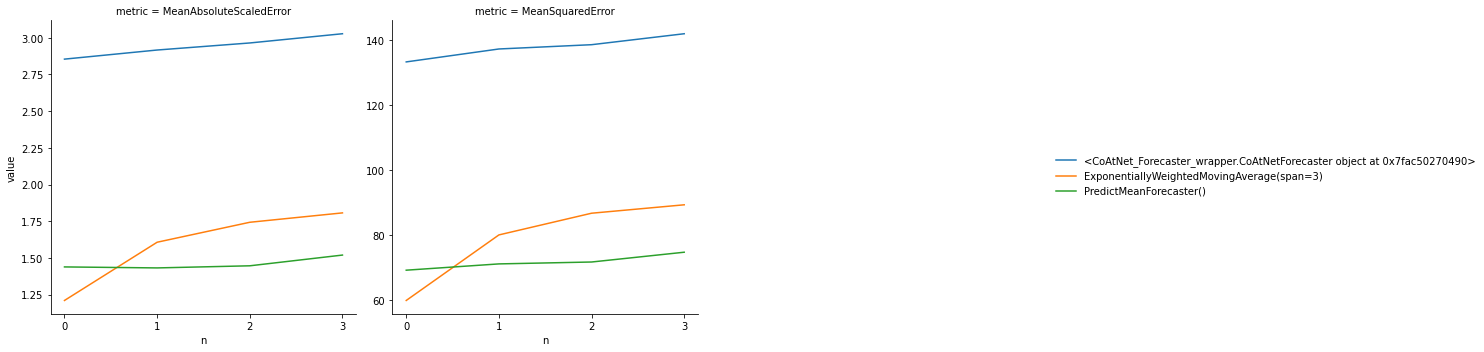

In [8]:
 metric_functions = [
    MeanAbsoluteScaledError(),
    MeanSquaredError(square_root=True),
]

metrics_df = atd2022.metrics.compute_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)

metrics_n = atd2022.metrics.compute_nstep_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)
display(metrics_df)
display(metrics_n)
display(atd2022.viz.plot_nstep_metrics(metrics_n))

Predictions Processed:   0%|          | 0/3 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/12 [00:00<?, ?it/s]

,MeanAbsoluteScaledError,MeanSquaredError
<CoAtNet_Forecaster_wrapper.CoAtNetForecaster object at 0x7fab8b40cb80>,2.747698,132.467750
PredictMeanForecaster(),1.459343,74.146892
ExponentiallyWeightedMovingAverage(span=3),1.591927,81.234780


MeanAbsoluteScaledError  \
model                                              n                            
<CoAtNet_Forecaster_wrapper.CoAtNetForecaster o... 0                 2.587996   
                                                   1                 2.701065   
                                                   2                 2.801931   
                                                   3                 2.899799   
ExponentiallyWeightedMovingAverage(span=3)         0                 1.210449   
                                                   1                 1.607165   
                                                   2                 1.743103   
                                                   3                 1.806993   
PredictMeanForecaster()                            0                 1.438947   
                                                   1                 1.432186   
                                                   2                 1.446583   
                                                   3                 1.519656   

                                                      MeanSquaredError  
model                                              n                    
<CoAtNet_Forecaster_wrapper.CoAtNetForecaster o... 0        123.125590  
                                                   1        128.730160  
                                                   2        132.119324  
                                                   3        136.364864  
ExponentiallyWeightedMovingAverage(span=3)         0         59.782868  
                                                   1         79.974515  
                                                   2         86.659919  
                                                   3         89.252260  
PredictMeanForecaster()                            0         69.110252  
                                                   1         71.046277  
                                                   2         71.629932  
                                                   3         74.645810

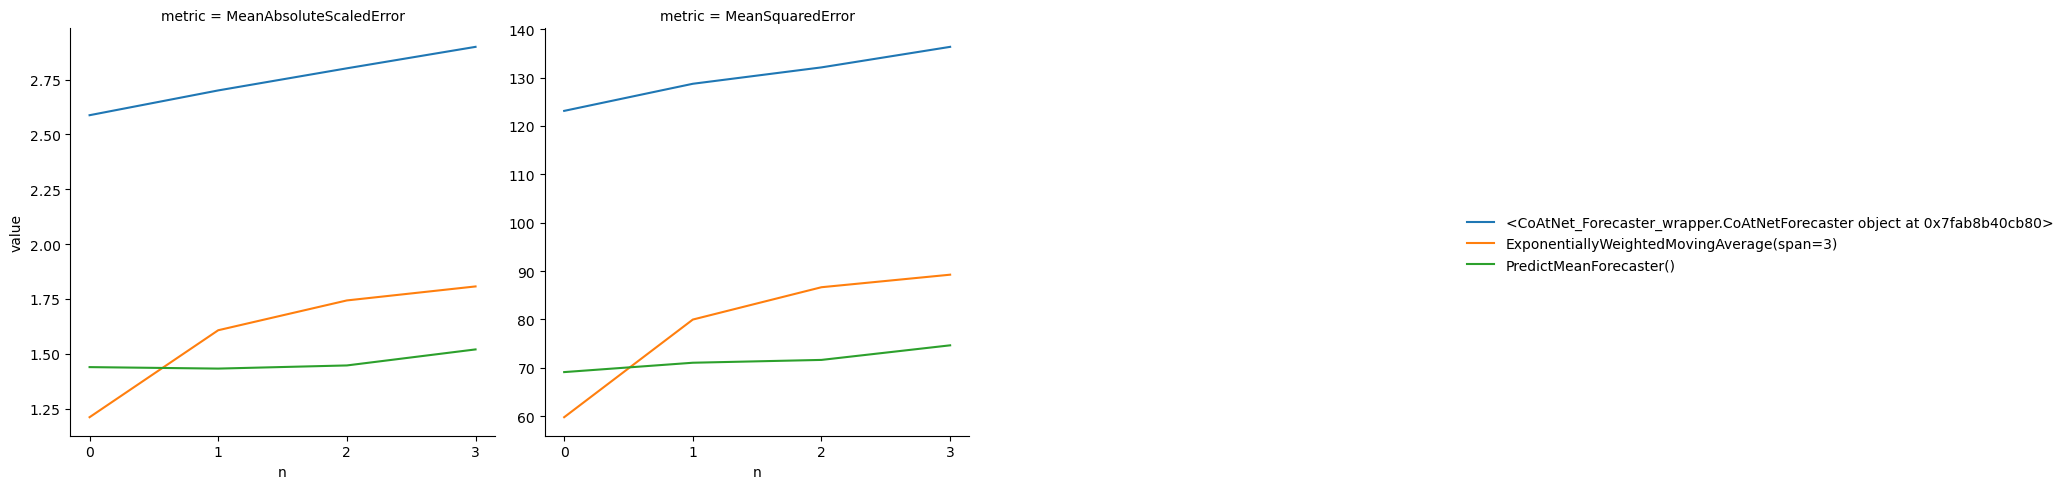

In [17]:
 metric_functions = [
    MeanAbsoluteScaledError(),
    MeanSquaredError(square_root=True),
]

metrics_df = atd2022.metrics.compute_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)

metrics_n = atd2022.metrics.compute_nstep_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)
display(metrics_df)
display(metrics_n)
display(atd2022.viz.plot_nstep_metrics(metrics_n))